In [16]:
from functions import vectorize_y_ser, oped_v_news

In [17]:
import string

In [18]:
import re

In [19]:
import datetime

In [20]:
import nltk
import string

In [21]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [22]:
import pandas as pd
import numpy as np

In [23]:
from collections import Counter

In [24]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [25]:
def vectorize_y_ser(ser):
    y = ser.copy()
    y.replace({'Op-Ed': 1,'News': 0}, inplace=True)
    return y

In [26]:
#returns articles w/ 'United States Politics and Government' as a keyword
def return_pol_gov(row):
    list_dict = eval(row.keywords)
    for (dic) in (list_dict):
        if dic.get('value') == 'United States Politics and Government':
            return True

def keyword_filter(df, keyword='United States Politics and Government'):
    df[keyword] = df.apply(return_pol_gov, axis=1)
    df = df[df[keyword] == True]
    return df

In [1]:
#combine print, type, text columns in the list
def printed(file):
    print_cols = ['_id','print_page','pub_date','keywords','type_of_material','lead_paragraph','text','word_count']    
    df = pd.read_csv(file, usecols=print_cols, index_col='_id', low_memory=False)
    df = df[df.print_page.isna() == False]
    df = df[~df.text.isna() == True]
    return df

# data

In [27]:
import os
import glob
import pandas as pd

#extension = 'csv'
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
df2020 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2020.csv'
df2019 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2019.csv'
df2018 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2018.csv'
df2017 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2017.csv'
df2016 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2016.csv'
df2015 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2015.csv'
df2014 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2014.csv'
df2013 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2013.csv'
df2012 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2012.csv'
df2011 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2011.csv'
df2010 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2010.csv'
df2009 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2009.csv'
df2008 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2008.csv'
df2007 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2007.csv'
df2006 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2006.csv'
df2005 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2005.csv'
df2004 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2004.csv'
df2003 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2003.csv'
df2002 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2002.csv'
df2001 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2001.csv'
df2000 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2000.csv'
df1999 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1999.csv'
df1998 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1998.csv'
df1997 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1997.csv'
df1996 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1996.csv'
df1995 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1995.csv'
df1994 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1994.csv'
df1993 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1993.csv'
df1992 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1992.csv'
df1991 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1991.csv'
df1990 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1990.csv'
df1989 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1989.csv'
df1988 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1988.csv'
df1987 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1987.csv'
df1986 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1986.csv'
df1985 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1985.csv'
df1984 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1984.csv'
df1983 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1983.csv'
df1982 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1982.csv'
df1981 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1981.csv'

In [28]:
#returns articles w/ 'United States Politics and Government' as a keyword
def return_pol_gov(row):
    list_dict = eval(row.keywords)
    for (dic) in (list_dict):
        if dic.get('value') == 'United States Politics and Government':
            return True

def keyword_filter(df, keyword='United States Politics and Government'):
    df[keyword] = df.apply(return_pol_gov, axis=1)
    df = df[df[keyword] == True]
    return df

In [105]:
data2020 = printed(df2020)
data2019 = printed(df2019)
data2018 = printed(df2018)
data2017 = printed(df2017)
# data2016 = printed(df2016)
# data2015 = printed(df2015)
# data2014 = printed(df2014)
# data2013 = printed(df2013)
# data2012 = printed(df2012)
# data2011 = printed(df2011)
# data2010 = printed(df2010)

In [106]:
%%time
data = pd.concat([data2020, data2019, data2018, data2017])#, data2016,data2015, data2014, data2013, data2012, data2011, data2010])

CPU times: user 175 ms, sys: 794 ms, total: 969 ms
Wall time: 1.5 s


News: 113679 Oped: 8197, Total: 121876, Op-Ed 0.07 of total


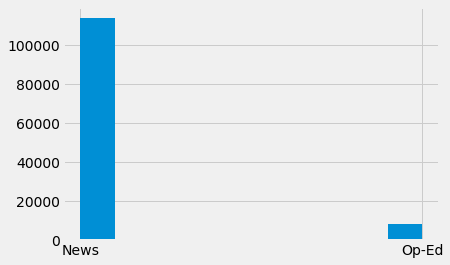

In [107]:
oped_v_news(data)

In [108]:
data.shape

(121876, 7)

In [109]:
%%time
df = keyword_filter(data)

CPU times: user 9.85 s, sys: 342 ms, total: 10.2 s
Wall time: 10.4 s


In [110]:
df.shape

(17822, 8)

In [111]:
df.columns

Index(['lead_paragraph', 'keywords', 'pub_date', 'type_of_material',
       'word_count', 'print_page', 'text',
       'United States Politics and Government'],
      dtype='object')

News: 14627 Oped: 3195, Total: 17822, Op-Ed 0.18 of total


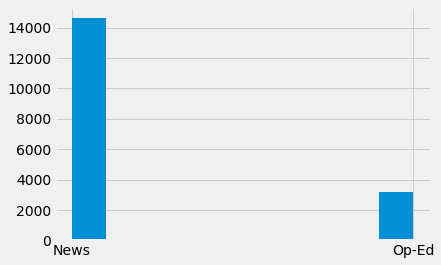

In [112]:
oped_v_news(df)

# remove lead paragraph

In [113]:
# replace lead paragraph in text with empty quotes
df['text'] = [text.replace(lead, "") for text, lead in zip(df.text[:].astype('str'), df.lead_paragraph[:].astype('str'))]

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [114]:
#confirm lead paragraph has been removed
df.text[0][:500]

'But as you drew closer to the fifth floor, where Attorney General William Pelham Barr works out of a suite of offices, things started to loosen up. One assistant outside his conference room wore a mask, but the other did not. In the middle of the room, with its oil paintings and vaulted ceiling, the long central table had fewer chairs than you might expect, and an appropriate distance between them. But past the next door, inside the attorney general’s smaller personal office, Barr himself was al'

# remove quotations

In [115]:
#split document into article body and quotation
def text_parse(document):
    article = []
    quote_list = []
    
    open_quote = "“"
    close_quote = "”"
    
    close_split = document.split(close_quote)
    
    for string in close_split:

        quote = string.split(open_quote)
        article.append(quote.pop(0))
        quote_list += quote
    
    article = " ".join(article)
    quotation = " ".join(quote_list)
        
    return(article, quotation)

In [116]:
#split article and return quote
def return_article(document):
    article = []
    quote_list = []
    
    open_quote = "“"
    close_quote = "”"
    
    close_split = document.split(close_quote)
    
    for string in close_split:

        quote = string.split(open_quote)
        article.append(quote.pop(0))
        quote_list += quote
    
    article = " ".join(article)
    quotation = " ".join(quote_list)
    
    return(article)

In [117]:
#split article and return quote
def return_quote(document):
    article = []
    quote_list = []
    
    open_quote = "“"
    close_quote = "”"
    
    close_split = document.split(close_quote)
    
    for string in close_split:

        quote = string.split(open_quote)
        article.append(quote.pop(0))
        quote_list.append(quote)
    
    article = " ".join(article)
#    quotation = " ".join(quote_list)
        
    return(quote_list)

In [118]:
# df['text'] = df.text.apply(return_article)

In [119]:
# df['text'][0][:500]

In [120]:
df['quote_list'] = df.text.apply(return_quote)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
df_news = df[df.type_of_material == 'News']

In [125]:
df_oped = df[df.type_of_material == "Op-Ed"]

In [137]:
df['quote_count'] = df.quote_list.apply(lambda x: len(x))

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [141]:
df.columns

Index(['lead_paragraph', 'keywords', 'pub_date', 'type_of_material',
       'word_count', 'print_page', 'text',
       'United States Politics and Government', 'quote_list', 'quote_count'],
      dtype='object')

In [142]:
news_word_quote_count = df['quote_count', 'word_count'].where(df.type_of_material == 'News')

KeyError: ('quote_count', 'word_count')

In [ ]:
news_word_quote_count = df['quote_count', 'word_count']

In [99]:
df.text

_id
nyt://article/f5d2e4a7-f89b-54da-9985-dd5fc704a51e    as you drew closer to the fifth floor where wo...
nyt://article/0fa09b77-5faa-588f-9d4a-39a34748c7f3    at a moment that is emerging as a critical tes...
nyt://article/6b274a69-c82b-5b68-bada-ec1467440ddf    court ruled that members of a government board...
nyt://article/8867f9cb-5914-5731-90b9-e1f1781fa568    their report posted online they also point to ...
nyt://article/fb5f6e07-033e-5618-967e-fbc1ebcfd61c    said in brief remarks in the the president beg...
                                                                            ...                        
nyt://article/b47c7977-3810-52d4-951b-7ad9e89f3b65    major policy battles over health care and taxa...
nyt://article/efdf8f07-a026-5e4f-8411-9eb40827b2e7    has however inherited his fathers affection fo...
nyt://article/e395b682-6d55-5d1f-981b-0a6d3daae3c4    are turning as they long have in times of unce...
nyt://article/5d1387dd-723c-51ef-ba68-2514b7752a95    gave h

# created keyword list

In [64]:
# def keyword_string(row):
    
#     dictionary_list = (eval(row))
#     output = " "
    
#     for dictionary in dictionary_list:
#         dict_value = dictionary.get('value')
#         output += (f'{dict_value} ')
#     return output.split(" ")

In [65]:
# df['keyword_list'] =  df.keywords.apply(keyword_string)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# remove punctuation

In [66]:
#string.punctuation
nytimes_punct = "”“"
open_quote = "“"
close_quote = "”"

In [67]:
#function that removes string.punctuation w/out the '?'
def punc_strip(document):
    for char in word_tokenize(document):
        if char in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~—':
            document = document.replace(char, " ")
        if char == "’":
            document = document.replace(char, "")
    return document

In [68]:
df['text'] = df.text.apply(punc_strip)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# remove capitalized words 

In [92]:
def remove_cap_words(row):
    temp = row.split()
    for i, word in enumerate(temp):
        if word[0].isupper():
            temp[i] = ""
            
    return " ".join(temp)
df['text'] = df.text.apply(remove_cap_words)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
df['text'][0]

'as you drew closer to the fifth floor where works out of a suite of offices things started to loosen up assistant outside his conference room wore a mask but the other did not the middle of the room with its oil paintings and vaulted ceiling the long central table had fewer chairs than you might expect and an appropriate distance between them past the next door inside the attorney generals smaller personal office himself was also mask-free around to greet his visitors he moved into the middle of a wide circle of four chairs arranged in front of his desk nearing the end of his career did not take his current job for the glory had already been attorney general once in administration winning him a reputation as a wise old man a reputation that in the eyes of some his tenure in the administration has tarnished is he doing it for the money time in corporate earned him tens of millions of dollars in compensation and stock options and his bearing is still that of a 500 counsel cozy manners w

# export

In [ ]:
#df.to_csv('data/token_2017_2020.csv')